# NLP Final Project - Entity Recognition

For this final project, there is a collection of ~200K news articles on our favorite topics, data science, machine learning, and artificial intelligence. Our task is to identify what industries and job lines are going to be most impacted by AI over the next several years, based on the information/insights you can extract from this text corpus.

Goal: provide actionable recommendations on what can be done with AI to automate the jobs, improve employee productivity, and generally make AI adoption successful. Please pay attention to the introduction of novel technologies and algorithms, such as AI for image generation and Conversational AI, as they represent the entire paradigm shift in adoption of AI technologies and data science in general.


In [3]:
# !pip install spacy

In [4]:
import pandas as pd
import spacy
from spacy import displacy

In [5]:
# spaCy v3.0 features all new transformer-based pipelines that bring spaCy’s accuracy right up to the current state-of-the-art.
spacy.__version__

'3.7.4'

In [8]:
!python -m spacy download en_core_web_lg

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 3.7 MB/s eta 0:00:0000:0100:01
DEPRECATION: flatbuffers 1.12.1-git20200711.33e2d80-dfsg1-0.6 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of flatbuffers or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [9]:
# Load SpaCy model
nlp = spacy.load("en_core_web_lg")


## Load Text

In [10]:
# Checking active pipeline components
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
# Load the topic labeled file
file_path = 'labeled_articles.csv'

df = pd.read_csv(file_path, encoding='latin1')

# Display loaded data
df.head()

,text,cleaned_text,topic_tokens,entity_tokens,topic
0,\n\nauckland.scoop.co.nz Â» AUT boosts AI expe...,aucklandscoopconz AUT boosts AI expertise wi...,"['aucklandscoopconz', 'aut', 'boost', 'ai', 'e...","['aucklandscoopconz', 'AUT', 'boosts', 'AI', '...",Topic 8
1,"\n\nObservation, Simulation, And AI Join Force...",Observation Simulation And AI Join Forces To ...,"['observ', 'simul', 'ai', 'join', 'forc', 'rev...","['Observation', 'Simulation', 'And', 'AI', 'Jo...",Topic 5
2,\n\nApplitools Visual AI Reaches One Billion I...,Applitools Visual AI Reaches One Billion Imag...,"['applitool', 'visual', 'ai', 'reach', 'one', ...","['Applitools', 'Visual', 'AI', 'Reaches', 'One...",Topic 6
3,\n\nData Science and Machine-Learning Platform...,Data Science and MachineLearning Platforms Ma...,"['data', 'scienc', 'machinelearn', 'platform',...","['Data', 'Science', 'and', 'MachineLearning', ...",Topic 17
4,\n\nHealthcare Artificial Intelligence Market ...,Healthcare Artificial Intelligence Market Ana...,"['healthcar', 'artifici', 'intellig', 'market'...","['Healthcare', 'Artificial', 'Intelligence', '...",Topic 17


In [12]:
text = df['cleaned_text']

In [15]:
# Define a function to extract entities from a text
def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

In [17]:
# Apply the function to each element in the Series
data_ents = text.apply(extract_entities)

# Flatten the list of entities and create a DataFrame
flattened_data_ents = [ent for sublist in data_ents for ent in sublist]
entities_df = pd.DataFrame(flattened_data_ents, columns=['Entity', 'Label'])

entities_df.head()

,Entity,Label
0,aucklandscoopconz AUT,ORG
1,AI,PRODUCT
2,AiLab Scoop,ORG
3,Tweet AUT,PERSON
4,AI,PRODUCT


In [42]:
entities_df.shape

(17737050, 2)

In [18]:
# view all the Entity labels
nlp.get_pipe("ner").labels

('CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART')

In [46]:
df=pd.read_csv('entities.csv', escapechar='\\')
df[:10]

,Unnamed: 0,Entity,Label
0,0,aucklandscoopconz AUT,ORG
1,1,AI,PRODUCT
2,2,AiLab Scoop,ORG
3,3,Tweet AUT,PERSON
4,4,AI,PRODUCT
5,5,AiLab,GPE
6,6,January 28 2020Education PressRelease0 comments,DATE
7,7,Press Release Auckland University of Technology,ORG
8,8,daily,DATE
9,9,AUTs Faculty of Design and Creative Technologies,ORG


In [47]:
entities = entities_df.drop_duplicates()
entities[:15]

,Entity,Label
0,aucklandscoopconz AUT,ORG
1,AI,PRODUCT
2,AiLab Scoop,ORG
3,Tweet AUT,PERSON
5,AiLab,GPE
6,January 28 2020Education PressRelease0 comments,DATE
7,Press Release Auckland University of Technology,ORG
8,daily,DATE
9,AUTs Faculty of Design and Creative Technologies,ORG
10,John Flackett,PERSON


In [48]:
entities.shape

(2230444, 2)

In [49]:
entities.to_csv('entities.csv', escapechar='\\')

In [6]:
df = pd.read_csv('entities.csv', escapechar='\\', index_col=0)
df.head()

,Entity,Label
0,aucklandscoopconz AUT,ORG
1,AI,PRODUCT
2,AiLab Scoop,ORG
3,Tweet AUT,PERSON
5,AiLab,GPE


In [14]:
df['Label'].value_counts()

Label
ORG            1039131
PERSON          448323
DATE            133593
PRODUCT         107649
CARDINAL        101050
WORK_OF_ART      94210
GPE              66270
TIME             55781
FAC              41111
EVENT            35484
MONEY            31018
NORP             24457
LOC              20624
QUANTITY         15650
LAW              10945
PERCENT           3779
LANGUAGE           757
ORDINAL            612
Name: count, dtype: int64

In [15]:
label_count = {
    'Label': [
        'ORG', 'PERSON', 'DATE', 'PRODUCT', 'CARDINAL', 'WORK_OF_ART', 
        'GPE', 'TIME', 'FAC', 'EVENT', 'MONEY', 'NORP', 'LOC', 'QUANTITY', 
        'LAW', 'PERCENT', 'LANGUAGE', 'ORDINAL'
    ],
    'count': [
        1039131, 448323, 133593, 107649, 101050, 94210, 66270, 55781, 
        41111, 35484, 31018, 24457, 20624, 15650, 10945, 3779, 757, 612
    ]
}

# Convert the data to a DataFrame
label_count = pd.DataFrame(label_count)


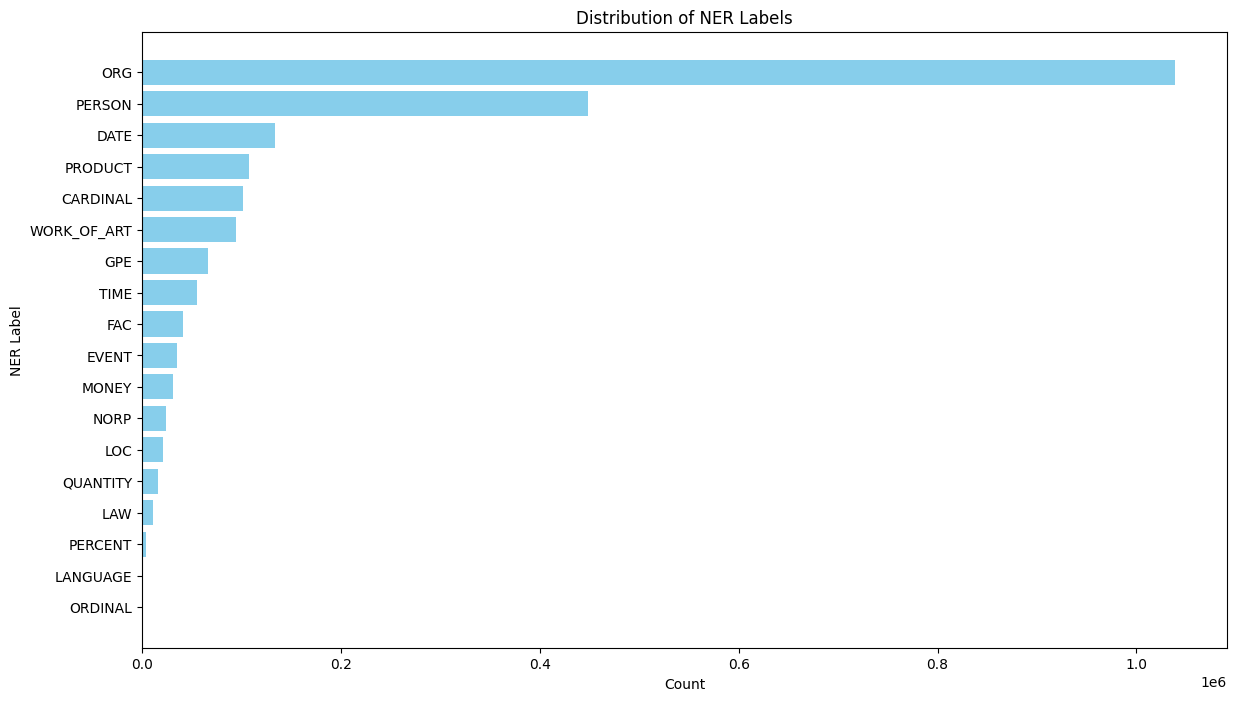

In [16]:
# Plotting the bar chart
plt.figure(figsize=(14, 8))
plt.barh(label_count['Label'], label_count['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('NER Label')
plt.title('Distribution of NER Labels')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top
plt.show()